In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. 시각화

### 1) 평균 비교 barplot

- 두 범주간 평균에 차이가 있는지?

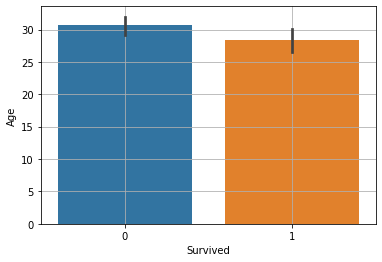

In [3]:
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid()
plt.show()

### 2) boxplot

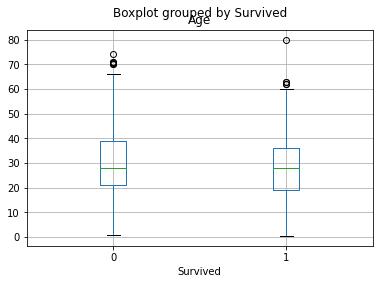

In [4]:
titanic.boxplot('Age', 'Survived')
plt.show()

## 2. 수치화

### 1) t-test (두 범주)

두 집단의 평균을 비교

- X -> Y의 관계에서 두 변수간 차이가 있는지, 없는지를 확인.
- NaN이 있으면 계산이 안됨. .notnull() 등으로 NaN을 제외한 데이터를 사용.
- t통계량
    - 두 평균의 차이를 표준오차로 나눈 값.
    - 두 평균의 차이로 이해.
    - 보통 t값이 -2보다 작거나, 2보다 크면 차이가 있다고 함.

In [5]:
# 모집단 만들기
pop1 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]
pop2 = [round(rd.normalvariate(170, 10),1) for i in range(100000)]

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


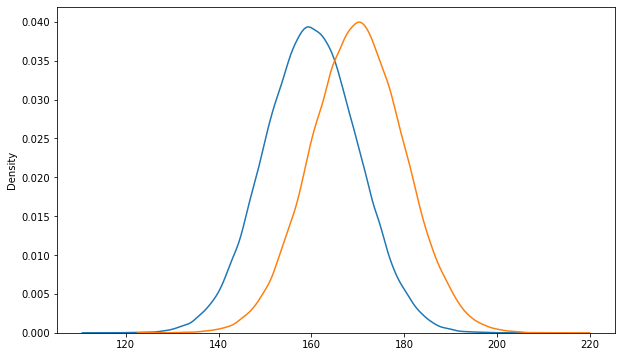

In [6]:
# 원래는 알 수 없는 모집단을 살짝 보기
plt.figure(figsize=(10,6))
sns.distplot(pop1, hist=False, kde=True)
sns.distplot(pop2, hist=False, kde=True)
plt.show()

In [7]:
# 표본을 추출합니다. 먼저 pop1으로 부터 두 샘플을 추출.
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop1,100)

In [8]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=-0.5735297631222372, pvalue=0.566936904154479)

- 이번에는 두 모집단으로부터 각각 샘플링

In [9]:
# 이번에는 두 모집단으로 부터 각각 샘플링
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop2,100)

In [10]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=-6.4149455087701535, pvalue=1.0151375124834433e-09)

- 타이타닉 데이터로 시도
    - 생존여부 --> Age: 생존여부 별로 나이에 차이가 있을 것이다.

In [11]:
# 먼저 NaN이 있는지 확인.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
temp = titanic.loc[titanic['Age'].notnull()] # null값 제거.
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

In [13]:
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

### 2) ANOVA (세 범주 이상)

- 분산 분석 (Analysis Of VAriance)
- 여러 집단 간 차이의 비교.
    - 기준은 전체 평균.
- F 통계량 =
    - (집단 간 분산) / (집단 내 분산) = (전체 평균 - 각 집단 평균) / (각 집단의 평균 - 개별 값)
    - 값이 대략 2 ~ 3 이상이면 차이가 있다고 판단.

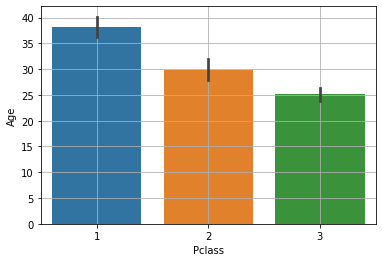

In [14]:
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

- 신뢰구간도 겹치지 않고, 평균 간 차이도 있음 --> 차이가 있어보임.

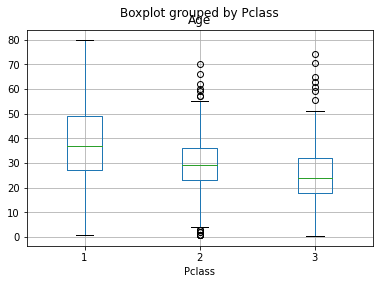

In [15]:
titanic.boxplot('Age', 'Pclass')
plt.show()

In [16]:
P_1 = titanic.loc[titanic.Pclass == 1, 'Age']
P_2 = titanic.loc[titanic.Pclass == 2, 'Age']
P_3 = titanic.loc[titanic.Pclass == 3, 'Age']

In [17]:
# null값이 존재
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=nan, pvalue=nan)

In [18]:
temp.isna().sum() # null값이 없는 temp로 작업.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [19]:
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

In [20]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

- 매우 관련이 있음.